In [21]:
import numpy as np
import matplotlib.pyplot as plt

import os
import copy

class MazeGenerator(object):
    def __init__(self, field_size):
        if type(field_size) not in [list, np.ndarray]:
            raise TypeError("field_size should be list or numpy.ndarray")
        for n in field_size:
            if n%2 == 0:
                raise ValueError("field_size shoud be odd number.")
        self.field_size = np.array([field_size[0] + 2, field_size[1] + 2])
        
        # field生成
        # 1 is road, 0 is wall
        self.field = np.ones(self.field_size)
        self.field[1:self.field_size[0]-1, 1:self.field_size[1]-1] = 0
        
        self.goal_points = []
        
    def check_maze(self):
        plt.pcolor(self.field)
        plt.show()
        plt.close()
    
    def save_maze(self):
        if not os.path.exists("maze_graph"):
            os.mkdir("maze_graph")
        plt.pcolor(self.field)
        plt.savefig("./maze_graph/maze_generate_{}.png".format(1000 + self.count))
        
    def generate(self, save=False):
        self.count = 0
        #start coordinate is left dowm corner
        start = np.array([2, 2])
        self.field[start[0], start[1]] = 1
        restart_candidate = []
        
        while self.field[2:-2:2, 2:-2:2].all() != 1:
            forward_vec, n_route = self._select_direction(start)
            
            if forward_vec is not None:
                self.update_field(start, forward_vec)
                
                #他に行くことのできる道が残っている場合restart候補に保存
                if n_route >= 1:
                    restart_candidate.append(start)
                #move
                start = start + forward_vec
                
                if save:
                    self.save_maze()
                    self.count += 1
            else:
                self.goal_points.append(start)
                #self.check_maze()
                    
                start = None
                while start is None:
                    candidate_index = np.random.choice(len(restart_candidate))
                    _, n_candidate = self._select_direction(restart_candidate[candidate_index])
                    if n_candidate +1 == 0:
                        del restart_candidate[candidate_index]
                        if len(restart_candidate) == 0:
                            break
                        continue
                    elif n_candidate +1 == 1:
                        start = restart_candidate[candidate_index]
                        del restart_candidate[candidate_index]
                    else :
                        start = restart_candidate[candidate_index]
                    
        
        self._make_goal()
        if save:
            self.save_maze()
        
            
    def _select_direction(self, ref_point):
        candidates = []
        for i in [-2, 2]:
            for index in [0, 1]:
                temp_vec = np.array([0, 0])
                temp_vec[index] = i
                
                forward = ref_point + temp_vec
                if self.field[forward[0], forward[1]] != 1:
                    candidates.append(temp_vec)
        try:
            forward_vec = candidates[np.random.choice(range(len(candidates)))]
            return forward_vec, len(candidates) -1 
        except:
            return None, -1
    
    def update_field(self, start, forward_vec):
        for i in range(1, 3):
            temp = start + forward_vec/i
            self.field[int(temp[0]), int(temp[1])] = 1
            
    def _make_goal(self):
        indexes = np.random.choice(range(len(self.goal_points)), 2, replace=False)
        self.start_point = self.goal_points[indexes[0]]
        self.goal_point = self.goal_points[indexes[1]]
        self.field[self.start_point[0], self.start_point[1]] = 0.5
        self.field[self.goal_point[0], self.goal_point[1]] = 0.8
        
        self.points = {"start":self.start_point, "goal":self.goal_point}
        
    def get_points(self):
        return self.points
    
    def get_maze(self):
        field = self.field
        field[field != 0] = 1
        return field
        
    def reset(self):
        self.field = np.ones(self.field_size)
        self.field[1:self.field_size[0]-1, 1:self.field_size[1]-1] = 0
        

In [24]:
mg = MazeGenerator([31, 31])
mg.generate(save = False)

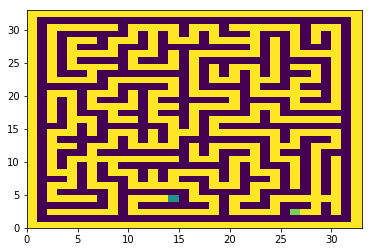

In [25]:
mg.check_maze()